In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

In [22]:
pickle_in = open("X_all.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_all.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [23]:
X.shape

(432, 256, 256, 3)

In [24]:
from keras.utils import to_categorical

y_cat = to_categorical(y,num_classes = 5)

In [25]:
y_cat

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [26]:
from sklearn.model_selection import train_test_split

In [196]:
X_train,X_test, y_train, y_test = train_test_split(X,y_cat, test_size=0.2)

In [242]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
# COMPILE
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [243]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batch_size = 32

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    zca_epsilon=0.1,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zca_whitening=False)


In [244]:
datagen.fit(X_train)

In [245]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
11/10 [==============================] - 25s 2s/step - loss: 2.4803 - acc: 0.4158 - val_loss: 1.6420 - val_acc: 0.1724
Epoch 2/20
11/10 [==============================] - 23s 2s/step - loss: 1.0401 - acc: 0.5737 - val_loss: 1.4612 - val_acc: 0.4023
Epoch 3/20
11/10 [==============================] - 24s 2s/step - loss: 0.8627 - acc: 0.6619 - val_loss: 1.2832 - val_acc: 0.4943
Epoch 4/20
11/10 [==============================] - 23s 2s/step - loss: 0.8817 - acc: 0.7004 - val_loss: 1.4505 - val_acc: 0.3678
Epoch 5/20
11/10 [==============================] - 23s 2s/step - loss: 0.7558 - acc: 0.7337 - val_loss: 1.4197 - val_acc: 0.4253
Epoch 6/20
11/10 [==============================] - 23s 2s/step - loss: 0.6882 - acc: 0.7652 - val_loss: 1.7466 - val_acc: 0.3908
Epoch 7/20
11/10 [==============================] - 24s 2s/step - loss: 0.7874 - acc: 0.7181 - val_loss: 1.5871 - val_acc: 0.2069
Epoch 8/20
11/10 [==============================] - 24s 2s/step - loss: 0.7774 - acc: 0.72

3


array([[0.10780726, 0.16194163, 0.2734687 , 0.3169822 , 0.13980019]],
      dtype=float32)

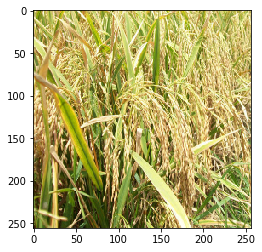

In [276]:
import numpy as np
n = 90
x = model.predict(np.reshape(X_train[n],(-1,256,256,3)))
plt.imshow(X_train[n])
print(np.argmax(x))
x

2

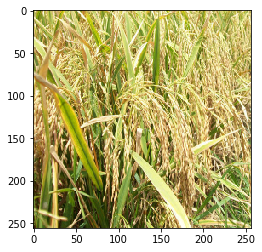

In [277]:
plt.imshow(X_train[n])
np.argmax(y_train[n])

In [184]:
xt = model.predict(X_test)
p_true = []
for i in range(0,len(xt)):
    p_true.append(np.argmax(xt[i]))

In [195]:
p_true.count(0)

0

In [173]:
59/87

0.6781609195402298

In [ ]:
n=117
print(model.predict(np.reshape(X[n],(-1,256,256,3))))
plt.imshow(X[n])

In [34]:
import matplotlib.pyplot as plt

In [ ]:
pred = model.predict(X)


In [ ]:
def func(x):
    if x>0.5:
        return 1
    else:
        return 0

In [ ]:
for i in range(0,200):
    if pred[i]>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

In [ ]:
pred

In [ ]:
y

In [ ]:
type(y)

In [ ]:
z = []
z = pred

In [ ]:
type(z)

In [ ]:
pred = list(pred)

In [ ]:
pred[4][0]

In [ ]:
p= []
for x in range(0,200):
    p.append(int(pred[x][0]))
    

In [ ]:
type(p)

In [ ]:
p

In [ ]:
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(y_true=y, y_pred=p)

In [ ]:
confusion_matrix

In [ ]:
(119 + 53)/200

In [ ]:

recall = precision = confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1])

In [ ]:
precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])

In [ ]:
confusion_matrix[1][1] + confusion_matrix[1][1]

In [ ]:
print(precision)
print(recall)

In [ ]:
F1 = 2 * (precision*recall)/(precision+recall)

In [ ]:
F1

In [ ]:
76/77

In [ ]:
a = precision

In [ ]:
b = recall

In [ ]:
F1 = 2 * (precision*recall)/(precision+recall)

In [ ]:
F1

In [ ]:
2 * (precision*recal)/(precision+recall)

In [ ]:
(a*b)/(a+b)

In [ ]:
a

In [ ]:
b

In [ ]:
(118+76)/200

In [ ]:
import cv2,os
img_array=[]

path = "/Users/ram/Documents/Project/Data/2/40.jpg"
img_array = cv2.imread(path)
img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)# convert to array
new_array = cv2.resize(img_array, (256, 256))

In [ ]:
model.predict(np.reshape(new_array,(-1,256,256,3)))

In [ ]:
plt.imshow(new_array)

In [ ]:
model.save("model_1_and_2.h5")

In [ ]:
#model = load_model(" ")